# Split Training Model For The Hybrid Autoencoder

### Library imports.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
from sklearn.metrics import accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt
import numpy as np
import math

import os

In [2]:
# Number of modes
modes = 1

# tt
train_state_select = 0

# Cutoff dimension (number of Fock states)
cutoff_dim = 3

# Input vector length.
input_len = 3

# Number of layers (depth)
Qlayers = 25

# Number of steps in optimization routine performing gradient descent
reps = 200

# Learning rate
lr = 0.05

# Standard deviation of initial parameters
passive_sd = 0.4
active_sd = 0.02

# The gamma parameter in the penalty function, given by the reference paper.
norm_weight = 400

# Seeds for the RNG functions to be able to reproduce results.
tf.random.set_seed(137)
np.random.seed(137)

# Phase space circile restriciton radius.
alpha_clip = 5

save_folder_name = str(input_len) + '_inputs'

os.makedirs(save_folder_name, exist_ok=True)

### Initialization of the classical encoder and decoder networks.

In [3]:
latent_dim = 2

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Dense(input_len, activation ="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(4, activation="elu"),
      layers.Dense(3, activation="elu"),
      layers.Dense(latent_dim, activation="elu"),
    ])
    
    self.decoder = tf.keras.Sequential([
        layers.Dense(input_len, activation="elu"),
        layers.Dense(3, activation="elu"),
        layers.Dense(4, activation="elu"),
        layers.Dense(5, activation="elu"),
        layers.Dense(5, activation="elu"),
        layers.Dense(5, activation="elu"),
        layers.Dense(5, activation="elu"),
        layers.Dense(5, activation="elu"),
        layers.Dense(5, activation="elu"),
        layers.Dense(5, activation="elu"),
        layers.Dense(5, activation="elu"),
        layers.Dense(5, activation="elu"),
        layers.Dense(5, activation="elu"),
        layers.Dense(4, activation="elu"),
        layers.Dense(3, activation="elu"),
        layers.Dense(input_len, activation="elu")
    ])
    

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [4]:
autoencoder = Autoencoder(latent_dim)

In [5]:
def GenerateTargetState(input_len, f):
    state = np.zeros(input_len)
    state[f] = 1.0
    train = np.array([state])
    return train, state
    
    
x_train, target_state = GenerateTargetState(input_len, train_state_select)
print('The target state for the training is chosen to be ' + str(target_state))

The target state for the training is chosen to be [1. 0. 0.]


### Compile the classical autoencoder.

In [6]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

### Train the classical autoencoder and obtain the latent space.

In [7]:
history = autoencoder.fit(x_train, x_train,
                epochs=300,
                validation_data=(x_train, x_train))

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.3366 - val_loss: 0.3246
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 0.3246 - val_loss: 0.3141
Epoch 3/300
1/1 [==============================] - 0s 15ms/step - loss: 0.3141 - val_loss: 0.3042
Epoch 4/300
1/1 [==============================] - 0s 15ms/step - loss: 0.3042 - val_loss: 0.2947
Epoch 5/300
1/1 [==============================] - 0s 18ms/step - loss: 0.2947 - val_loss: 0.2854
Epoch 6/300
1/1 [==============================] - 0s 16ms/step - loss: 0.2854 - val_loss: 0.2764
Epoch 7/300
1/1 [==============================] - 0s 16ms/step - loss: 0.2764 - val_loss: 0.2676
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 0.2676 - val_loss: 0.2590
Epoch 9/300
1/1 [==============================] - 0s 16ms/step - loss: 0.2590 - val_loss: 0.2508
Epoch 10/300
1/1 [==============================] - 0s 16ms/step - loss: 0.2508 - val_loss: 0.2427
Epoch 11/300
1/1 [===

Epoch 84/300
1/1 [==============================] - 0s 49ms/step - loss: 0.0687 - val_loss: 0.0678
Epoch 85/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0678 - val_loss: 0.0670
Epoch 86/300
1/1 [==============================] - 0s 28ms/step - loss: 0.0670 - val_loss: 0.0661
Epoch 87/300
1/1 [==============================] - 0s 28ms/step - loss: 0.0661 - val_loss: 0.0653
Epoch 88/300
1/1 [==============================] - 0s 36ms/step - loss: 0.0653 - val_loss: 0.0644
Epoch 89/300
1/1 [==============================] - 0s 30ms/step - loss: 0.0644 - val_loss: 0.0636
Epoch 90/300
1/1 [==============================] - 0s 23ms/step - loss: 0.0636 - val_loss: 0.0628
Epoch 91/300
1/1 [==============================] - 0s 24ms/step - loss: 0.0628 - val_loss: 0.0620
Epoch 92/300
1/1 [==============================] - 0s 25ms/step - loss: 0.0620 - val_loss: 0.0612
Epoch 93/300
1/1 [==============================] - 0s 21ms/step - loss: 0.0612 - val_loss: 0.0604
Epoch 94/3

1/1 [==============================] - 0s 20ms/step - loss: 0.0147 - val_loss: 0.0143
Epoch 167/300
1/1 [==============================] - 0s 23ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 168/300
1/1 [==============================] - 0s 21ms/step - loss: 0.0138 - val_loss: 0.0134
Epoch 169/300
1/1 [==============================] - 0s 21ms/step - loss: 0.0134 - val_loss: 0.0130
Epoch 170/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0130 - val_loss: 0.0125
Epoch 171/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0125 - val_loss: 0.0121
Epoch 172/300
1/1 [==============================] - 0s 21ms/step - loss: 0.0121 - val_loss: 0.0117
Epoch 173/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0117 - val_loss: 0.0113
Epoch 174/300
1/1 [==============================] - 0s 18ms/step - loss: 0.0113 - val_loss: 0.0109
Epoch 175/300
1/1 [==============================] - 0s 18ms/step - loss: 0.0109 - val_loss: 0.0106
Epoch 176/300


Epoch 246/300
1/1 [==============================] - 0s 18ms/step - loss: 6.1646e-05 - val_loss: 5.3601e-05
Epoch 247/300
1/1 [==============================] - 0s 18ms/step - loss: 5.3601e-05 - val_loss: 4.6441e-05
Epoch 248/300
1/1 [==============================] - 0s 18ms/step - loss: 4.6441e-05 - val_loss: 4.0086e-05
Epoch 249/300
1/1 [==============================] - 0s 18ms/step - loss: 4.0086e-05 - val_loss: 3.4465e-05
Epoch 250/300
1/1 [==============================] - 0s 18ms/step - loss: 3.4465e-05 - val_loss: 2.9508e-05
Epoch 251/300
1/1 [==============================] - 0s 18ms/step - loss: 2.9508e-05 - val_loss: 2.5151e-05
Epoch 252/300
1/1 [==============================] - 0s 17ms/step - loss: 2.5151e-05 - val_loss: 2.1336e-05
Epoch 253/300
1/1 [==============================] - 0s 17ms/step - loss: 2.1336e-05 - val_loss: 1.8008e-05
Epoch 254/300
1/1 [==============================] - 0s 17ms/step - loss: 1.8008e-05 - val_loss: 1.5116e-05
Epoch 255/300
1/1 [=========

In [8]:
encoded_st = autoencoder.encoder(x_train).numpy()
decoded_st = autoencoder.decoder(encoded_st).numpy()

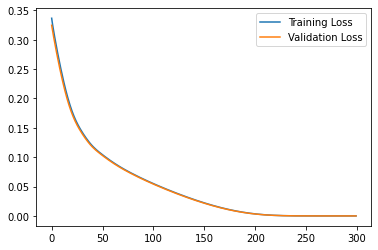

In [9]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [10]:
print(encoded_st)
np.savetxt(save_folder_name +'/encoded_ '+ str(train_state_select) +'.txt', encoded_st)

[[ 0.5461941 -0.7412164]]


In [11]:
import strawberryfields as sf
from strawberryfields import ops
sf.about()


Strawberry Fields: a Python library for continuous-variable quantum circuits.
Copyright 2018-2020 Xanadu Quantum Technologies Inc.

Python version:            3.9.7
Platform info:             Windows-10-10.0.22000-SP0
Installation path:         C:\Users\Bartu\anaconda3\envs\qml\lib\site-packages\strawberryfields
Strawberry Fields version: 0.23.0
Numpy version:             1.22.2
Scipy version:             1.8.0
SymPy version:             1.9
NetworkX version:          2.6.3
The Walrus version:        0.18.0
Blackbird version:         0.4.0
XCC version:               0.2.1
TensorFlow version:        2.8.0


In [12]:
def layer(params, q):
    """CV quantum neural network layer acting on ``N`` modes.

    Args:
        params (list[float]): list of length ``2*(max(1, N-1) + N**2 + n)`` containing
            the number of parameters for the layer
        q (list[RegRef]): list of Strawberry Fields quantum registers the layer
            is to be applied to
    """
    ops.Dgate(tf.clip_by_value(encoded_st[0][0], clip_value_min = -alpha_clip, clip_value_max = alpha_clip), math.degrees(encoded_st[0][1])) | q[0]
    
    N = len(q)
    M = int(N * (N - 1)) + max(1, N - 1)

    rphi = params[-N+1:]
    s = params[M:M+N]
    dr = params[2*M+N:2*M+2*N]
    dp = params[2*M+2*N:2*M+3*N]
    k = params[2*M+3*N:2*M+4*N]
    
    ops.Rgate(rphi[0]) | q[0]
    
    for i in range(N):
        ops.Sgate(s[i]) | q[i]

    ops.Rgate(rphi[0]) | q[0]

    for i in range(N):
        ops.Dgate(dr[i], dp[i]) | q[i]
        ops.Kgate(k[i]) | q[i]

### Initialization of layer weights.

In [13]:
def init_weights(modes, layers, active_sd=0.0001, passive_sd=0.1):
    """Initialize a 2D TensorFlow Variable containing normally-distributed
    random weights for an ``N`` mode quantum neural network with ``L`` layers.

    Args:
        modes (int): the number of modes in the quantum neural network
        layers (int): the number of layers in the quantum neural network
        active_sd (float): the standard deviation used when initializing
            the normally-distributed weights for the active parameters
            (displacement, squeezing, and Kerr magnitude)
        passive_sd (float): the standard deviation used when initializing
            the normally-distributed weights for the passive parameters
            (beamsplitter angles and all gate phases)

    Returns:
        tf.Variable[tf.float32]: A TensorFlow Variable of shape
        ``[layers, 2*(max(1, modes-1) + modes**2 + modes)]``, where the Lth
        row represents the layer parameters for the Lth layer.
    """
    # Number of interferometer parameters:
    M = int(modes * (modes - 1)) + max(1, modes - 1)

    # Create the TensorFlow variables
    int1_weights = tf.random.normal(shape=[layers, M], stddev=passive_sd)
    s_weights = tf.random.normal(shape=[layers, modes], stddev=active_sd)
    int2_weights = tf.random.normal(shape=[layers, M], stddev=passive_sd)
    dr_weights = tf.random.normal(shape=[layers, modes], stddev=active_sd)
    dp_weights = tf.random.normal(shape=[layers, modes], stddev=passive_sd)
    k_weights = tf.random.normal(shape=[layers, modes], stddev=active_sd)

    weights = tf.concat(
        [int1_weights, s_weights, int2_weights, dr_weights, dp_weights, k_weights], axis=1
    )

    weights = tf.Variable(weights)

    return weights

In [14]:
# initialize engine and program
eng = sf.Engine(backend="tf", backend_options={"cutoff_dim": cutoff_dim})
qnn = sf.Program(modes)

# initialize QNN weights
weights = init_weights(modes, Qlayers) # our TensorFlow weights
num_params = np.prod(weights.shape)   # total number of parameters in our model

In [15]:
# Create array of Strawberry Fields symbolic gate arguments, matching
# the size of the weights Variable.
sf_params = np.arange(num_params).reshape(weights.shape).astype(np.str)
sf_params = np.array([qnn.params(*i) for i in sf_params])


# Construct the symbolic Strawberry Fields program by
# looping and applying layers to the program.
with qnn.context as q:
    for k in range(Qlayers):
        layer(sf_params[k], q)

C:\Users\Bartu\AppData\Local\Temp\ipykernel_1808\2132937993.py:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


### Definition of the quantum cost function.

In [16]:
def cost(weights):
    # Create a dictionary mapping from the names of the Strawberry Fields
    # free parameters to the TensorFlow weight values.
    mapping = {p.name: w for p, w in zip(sf_params.flatten(), tf.reshape(weights, [-1]))}

    # Run engine
    state = eng.run(qnn, args=mapping).state

    # Extract the statevector
    ket = state.ket()

    # Compute the fidelity between the output statevector
    # and the target state.
    fidelity = tf.abs(tf.reduce_sum(tf.math.conj(ket) * target_state)) ** 2

    # Objective function to minimize
    #cost = tf.abs(tf.reduce_sum(tf.math.conj(ket) * target_state) - 1)
    #return cost, fidelity, ket
    # Instead of the Cost function, maybe it is better to break it down to components
    # at least, when the Fock basis is insufficent, it will be visible
    difference = tf.reduce_sum(tf.abs(ket - target_state))
    fidelity = tf.abs(tf.reduce_sum(tf.math.conj(ket) * target_state)) ** 2
    return difference, fidelity, ket, tf.math.real(state.trace())

### Optimizer definition.

In [17]:
opt = tf.keras.optimizers.Adam(learning_rate=lr)


### Train the quantum decoder.

In [18]:
fid_progress = []
loss_progress = []
best_fid = 0

for i in range(reps):
    # reset the engine if it has already been executed
    if eng.run_progs:
        eng.reset()

    with tf.GradientTape() as tape:
        loss, fid, ket, trace = cost(weights)

    # Stores fidelity at each step
    fid_progress.append(fid.numpy())
    
    loss_progress.append(loss)

    if fid > best_fid:
        # store the new best fidelity and best state
        best_fid = fid.numpy()
        learnt_state = ket.numpy()

    # one repetition of the optimization
    gradients = tape.gradient(loss, weights)
    opt.apply_gradients(zip([gradients], [weights]))

    # Prints progress at every rep
    if i % 1 == 0:
        print("Rep: {} Cost: {:.4f} Fidelity: {:.4f} Trace: {:.4f}".format(i, loss, fid, trace))

Rep: 0 Cost: 1.0279 Fidelity: 0.0001 Trace: 0.0005
Rep: 1 Cost: 1.0514 Fidelity: 0.0004 Trace: 0.0012
Rep: 2 Cost: 1.0219 Fidelity: 0.0001 Trace: 0.0004
Rep: 3 Cost: 1.0372 Fidelity: 0.0001 Trace: 0.0005
Rep: 4 Cost: 1.0064 Fidelity: 0.0001 Trace: 0.0001
Rep: 5 Cost: 0.9990 Fidelity: 0.0003 Trace: 0.0004
Rep: 6 Cost: 0.9974 Fidelity: 0.0003 Trace: 0.0005
Rep: 7 Cost: 0.9960 Fidelity: 0.0004 Trace: 0.0005
Rep: 8 Cost: 0.9901 Fidelity: 0.0004 Trace: 0.0004
Rep: 9 Cost: 0.9903 Fidelity: 0.0003 Trace: 0.0003
Rep: 10 Cost: 0.9873 Fidelity: 0.0002 Trace: 0.0002
Rep: 11 Cost: 0.9886 Fidelity: 0.0003 Trace: 0.0003
Rep: 12 Cost: 0.9839 Fidelity: 0.0005 Trace: 0.0005
Rep: 13 Cost: 0.9729 Fidelity: 0.0011 Trace: 0.0011
Rep: 14 Cost: 0.9571 Fidelity: 0.0024 Trace: 0.0024
Rep: 15 Cost: 0.9366 Fidelity: 0.0047 Trace: 0.0047
Rep: 16 Cost: 0.9314 Fidelity: 0.0080 Trace: 0.0081
Rep: 17 Cost: 0.8973 Fidelity: 0.0119 Trace: 0.0120
Rep: 18 Cost: 0.8826 Fidelity: 0.0217 Trace: 0.0221
Rep: 19 Cost: 0.8334 F

Rep: 157 Cost: 0.1401 Fidelity: 0.8995 Trace: 0.9006
Rep: 158 Cost: 0.1367 Fidelity: 0.8952 Trace: 0.8962
Rep: 159 Cost: 0.0876 Fidelity: 0.8967 Trace: 0.8972
Rep: 160 Cost: 0.0851 Fidelity: 0.8968 Trace: 0.8976
Rep: 161 Cost: 0.0691 Fidelity: 0.9022 Trace: 0.9025
Rep: 162 Cost: 0.1176 Fidelity: 0.8998 Trace: 0.9024
Rep: 163 Cost: 0.1544 Fidelity: 0.8917 Trace: 0.8940
Rep: 164 Cost: 0.1110 Fidelity: 0.9007 Trace: 0.9010
Rep: 165 Cost: 0.1048 Fidelity: 0.9007 Trace: 0.9023
Rep: 166 Cost: 0.0944 Fidelity: 0.9015 Trace: 0.9029
Rep: 167 Cost: 0.0903 Fidelity: 0.9000 Trace: 0.9004
Rep: 168 Cost: 0.1470 Fidelity: 0.9057 Trace: 0.9075
Rep: 169 Cost: 0.1353 Fidelity: 0.8974 Trace: 0.9005
Rep: 170 Cost: 0.0837 Fidelity: 0.9078 Trace: 0.9078
Rep: 171 Cost: 0.1598 Fidelity: 0.8917 Trace: 0.8966
Rep: 172 Cost: 0.1713 Fidelity: 0.8908 Trace: 0.8991
Rep: 173 Cost: 0.1366 Fidelity: 0.8960 Trace: 0.8996
Rep: 174 Cost: 0.0976 Fidelity: 0.9067 Trace: 0.9069
Rep: 175 Cost: 0.1244 Fidelity: 0.8966 Trace: 

### Produce fidelity plot.

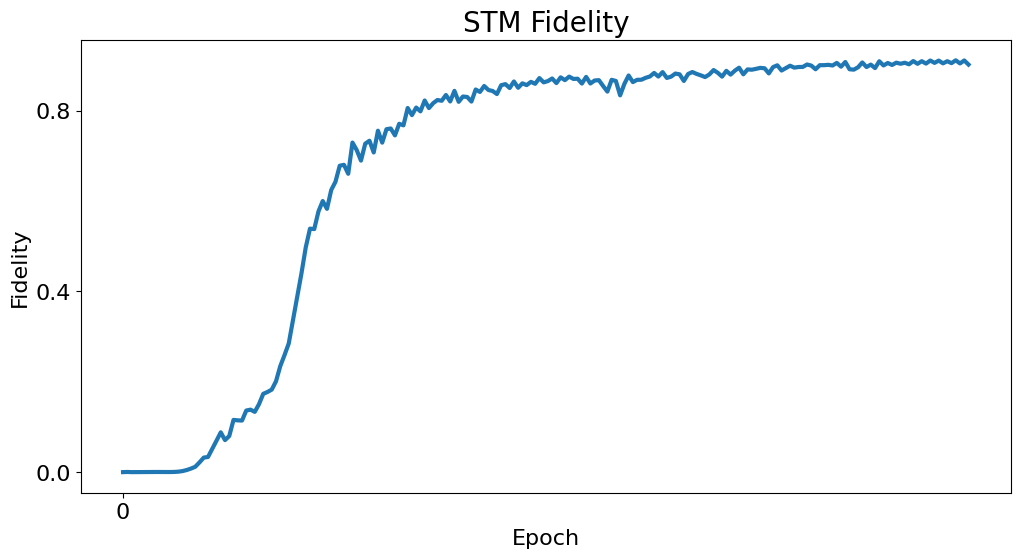

In [19]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

fig, ax = plt.subplots(figsize=(12, 6), dpi = 100)

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

plt.plot(fid_progress, linewidth = 3)
plt.ylabel("Fidelity", fontsize = '16')
ax.yaxis.set_ticks(np.arange(0, 1, 0.4))
plt.xlabel("Epoch", fontsize = '16')
ax.xaxis.set_ticks(np.arange(0, reps, 200))
plt.title('STM Fidelity', fontsize = '20')


plt.savefig('STM_fidelity.png')

### Produce loss plot.

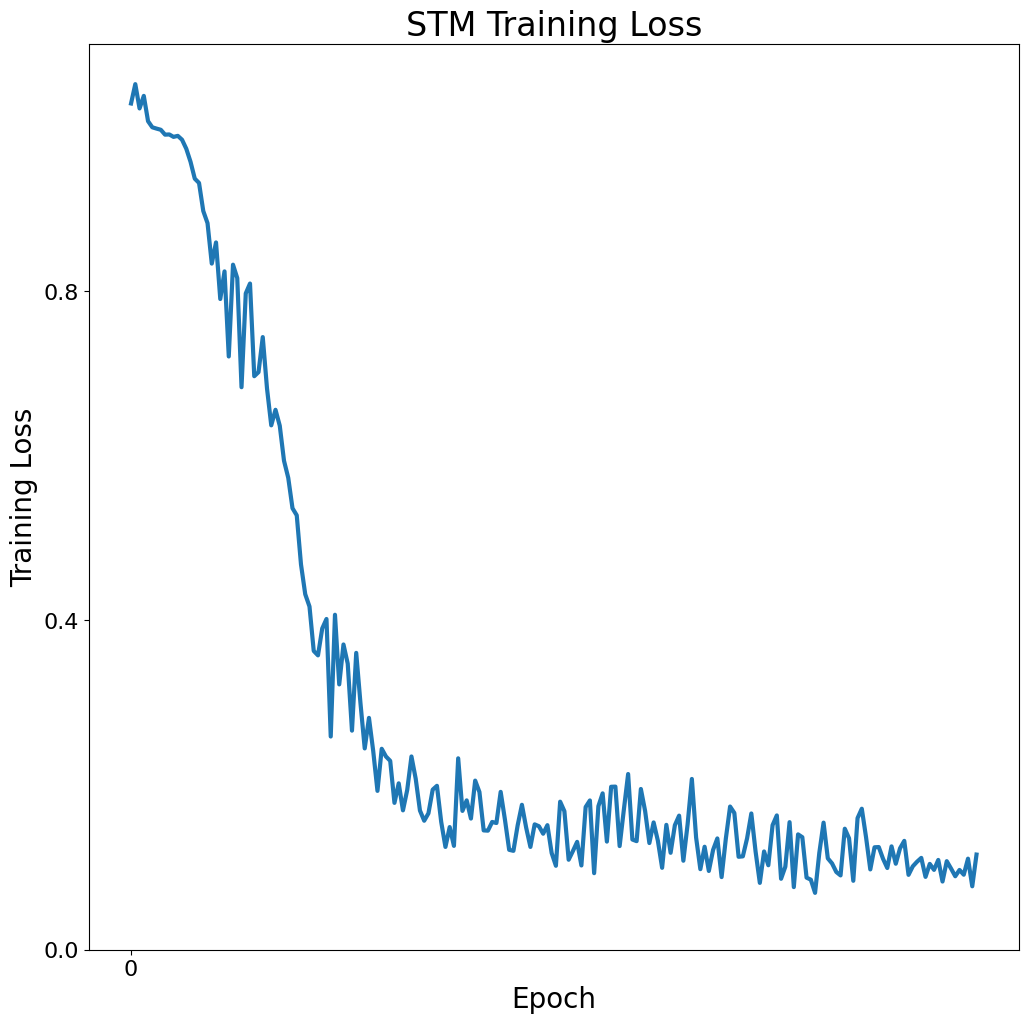

In [20]:
fig, ax = plt.subplots(figsize=(12, 12), dpi = 100)

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

plt.plot(loss_progress, linewidth = 3)
plt.ylabel("Training Loss", fontsize = '20')
ax.yaxis.set_ticks(np.arange(0, 1, 0.4))
plt.xlabel("Epoch", fontsize = '20')
ax.xaxis.set_ticks(np.arange(0, reps, 200))
plt.title('STM Training Loss', fontsize = '24')


plt.savefig('STM_loss.png')

### Definition of the function that plots Wigner functions.

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def wigner(rho):
    """This code is a modified version of the 'iterative' method
    of the wigner function provided in QuTiP, which is released
    under the BSD license, with the following copyright notice:

    Copyright (C) 2011 and later, P.D. Nation, J.R. Johansson,
    A.J.G. Pitchford, C. Granade, and A.L. Grimsmo.

    All rights reserved."""
    import copy

    # Domain parameter for Wigner function plots
    l = 5.0
    cutoff = rho.shape[0]

    # Creates 2D grid for Wigner function plots
    x = np.linspace(-l, l, 100)
    p = np.linspace(-l, l, 100)

    Q, P = np.meshgrid(x, p)
    A = (Q + P * 1.0j) / (2 * np.sqrt(2 / 2))

    Wlist = np.array([np.zeros(np.shape(A), dtype=complex) for k in range(cutoff)])

    # Wigner function for |0><0|
    Wlist[0] = np.exp(-2.0 * np.abs(A) ** 2) / np.pi

    # W = rho(0,0)W(|0><0|)
    W = np.real(rho[0, 0]) * np.real(Wlist[0])

    for n in range(1, cutoff):
        Wlist[n] = (2.0 * A * Wlist[n - 1]) / np.sqrt(n)
        W += 2 * np.real(rho[0, n] * Wlist[n])

    for m in range(1, cutoff):
        temp = copy.copy(Wlist[m])
        # Wlist[m] = Wigner function for |m><m|
        Wlist[m] = (2 * np.conj(A) * temp - np.sqrt(m) * Wlist[m - 1]) / np.sqrt(m)

        # W += rho(m,m)W(|m><m|)
        W += np.real(rho[m, m] * Wlist[m])

        for n in range(m + 1, cutoff):
            temp2 = (2 * A * Wlist[n - 1] - np.sqrt(m) * temp) / np.sqrt(n)
            temp = copy.copy(Wlist[n])
            # Wlist[n] = Wigner function for |m><n|
            Wlist[n] = temp2

            # W += rho(m,n)W(|m><n|) + rho(n,m)W(|n><m|)
            W += 2 * np.real(rho[m, n] * Wlist[n])

    return Q, P, W / 2

### Obtain the target and learnt states from the quantum decoder.

In [22]:
rho_target = np.outer(target_state, target_state.conj())
rho_learnt = np.outer(learnt_state, learnt_state.conj())

### Plot the target state as a Wigner function.

C:\Users\Bartu\AppData\Local\Temp\ipykernel_1808\1595207717.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


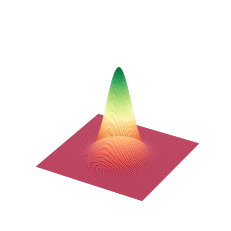

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
X, P, W = wigner(rho_target)
ax.plot_surface(X, P, W, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
ax.contour(X, P, W, 10, cmap="RdYlGn", linestyles="solid", offset=-0.17)
ax.set_axis_off()
fig.show()

### Plot the learnt state as a Wigner function.

C:\Users\Bartu\AppData\Local\Temp\ipykernel_1808\4117463628.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


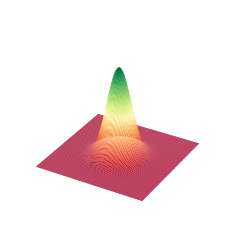

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
X, P, W = wigner(rho_learnt)
ax.plot_surface(X, P, W, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
ax.contour(X, P, W, 10, cmap="RdYlGn", linestyles="solid", offset=-0.17)
ax.set_axis_off()
fig.show()

In [25]:
np.savetxt(save_folder_name + '/x' + str(train_state_select) + '.txt', X)
np.savetxt(save_folder_name + '/p' + str(train_state_select) + '.txt', P)
np.savetxt(save_folder_name + '/w' + str(train_state_select) + '.txt', W)